In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("gene_expression.csv")

## Data

In [8]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [7]:
X = df.drop("Cancer Present", axis= 1)
y = df["Cancer Present"]

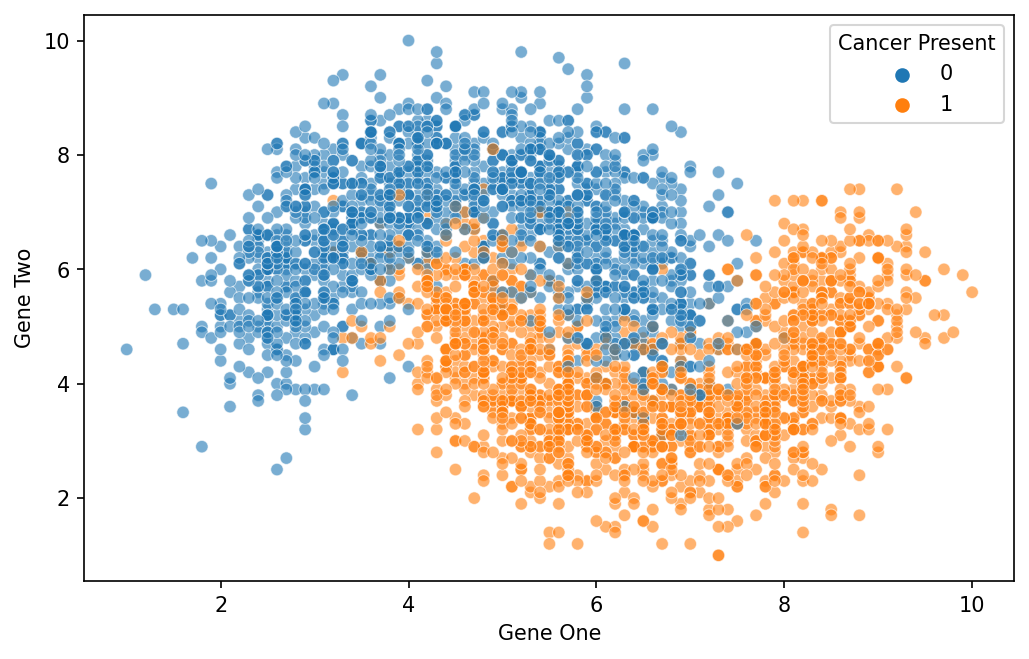

In [18]:
plt.figure(figsize=(8,5),dpi=150)
sns.scatterplot(data=df, x="Gene One", y="Gene Two",
 hue="Cancer Present", alpha=0.6);

(4.0, 8.0)

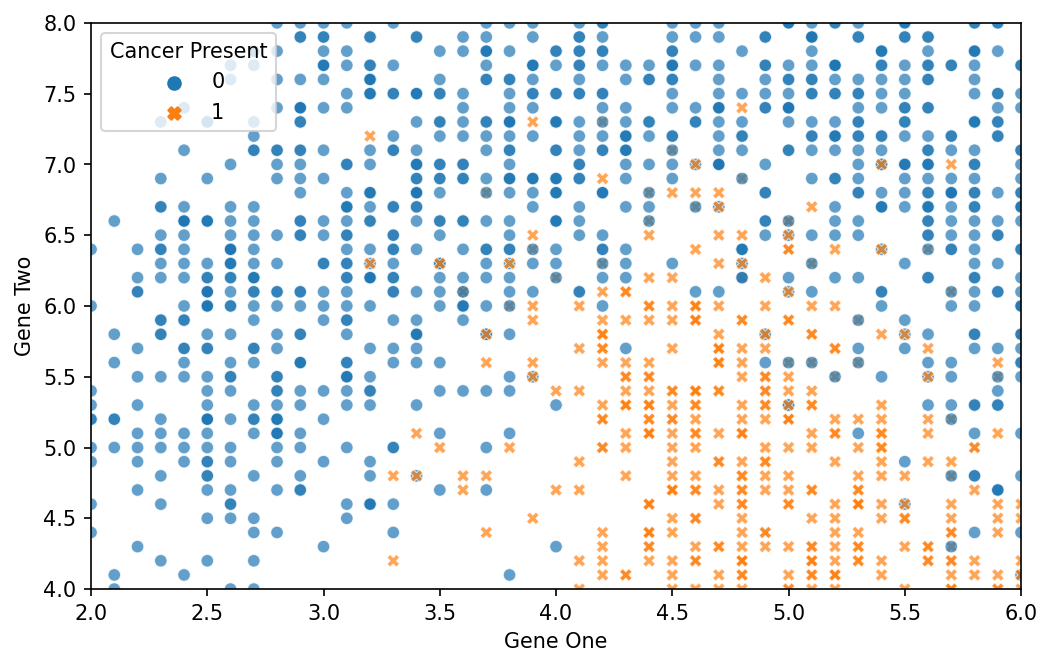

In [23]:
plt.figure(figsize=(8,5),dpi=150)
sns.scatterplot(data=df, x="Gene One", y="Gene Two",
 hue="Cancer Present", alpha=0.7, style="Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

<Figure size 1200x750 with 0 Axes>

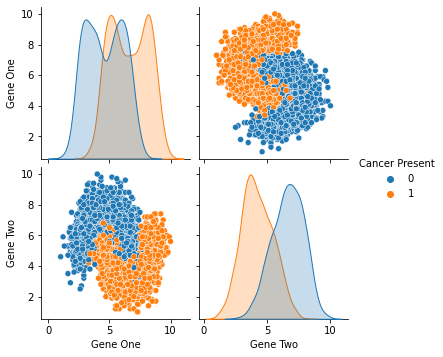

In [26]:
plt.figure(figsize=(8,5),dpi=150)
sns.pairplot(data=df, hue="Cancer Present")

## Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_Train = scaler.fit_transform(X_train)
scaled_X_Test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn_model.fit(scaled_X_Train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
y_pred = knn_model.predict(scaled_X_Test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [40]:
df["Cancer Present"].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

## Choosing K

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
1 - accuracy_score(y_test,y_pred)

0.10777777777777775

In [46]:
test_error_rate =[]

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_Train,y_train)

    y_pred_test = knn_model.predict(scaled_X_Test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [47]:
test_error_rate

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0, 0.5, 'K Neighbors')

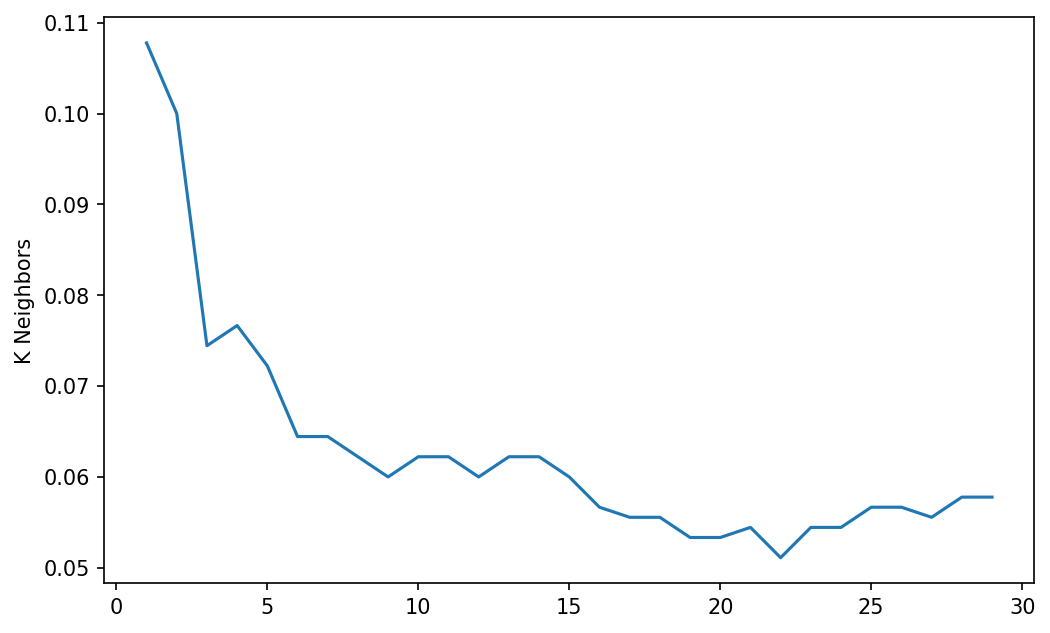

In [49]:
plt.figure(figsize=(8,5),dpi=150)
plt.plot(range(1,30),test_error_rate)
plt.ylabel("ERROR RATE")
plt.ylabel("K Neighbors")

## Pipeline

In [ ]:
scaler = StandardScaler()

In [51]:
knn = KNeighborsClassifier()

In [56]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [60]:
operations = [("scaler",scaler),("knn",knn)]

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline(operations)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [66]:
param_grid = {'knn__n_neighbors': k_values}

In [67]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [69]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [71]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [73]:
full_pred = full_cv_classifier.predict(X_test)

In [74]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [83]:
new_patient=[[3.2,2.2]]

In [84]:
full_cv_classifier.predict(new_patient)

array([1], dtype=int64)

In [85]:
full_cv_classifier.predict_proba(new_patient)

array([[0.35714286, 0.64285714]])